# Étude sur le clustering de la consommation électrique des bâtiments du secteur residentiel

## Contexte

Dans le cadre de la transition énergétique des villes, Efficacity, un institut de recherche et développement dédié à la transition énergétique urbaine, développe plusieurs logiciels de simulation. Ces outils sont conçus pour aider à la prise de décision dans les projets d'aménagement urbain en prenant en compte la valorisation des énergies renouvelables et de récupération, ainsi que le choix des systèmes énergétiques en fonction des besoins spécifiques des bâtiments.

Un aspect crucial de ces logiciels est la détermination des besoins énergétiques des bâtiments. À cette fin, une base de données de profils de besoins énergétiques a été créée. Cette base de données est essentielle pour les simulations à l'échelle d'un quartier. Initialement, un échantillon représentatif des bâtiments français a été créé en classifiant les bâtiments par typologie. Les bâtiments sélectionnés ont ensuite été simulés à l'aide du logiciel DIMOSIM, spécialisé dans la simulation énergétique urbaine, afin de calculer leurs profils de besoins énergétiques. Cette base de données est constamment enrichie et mise à jour.

Pour cette étude particulière, nous disposons de données de caractérisation pour 269 bâtiments, ainsi que des données sur les besoins d'électricité, les besoins en électricité pour le chauffage et les besoins en électricité pour la production d'eau chaude, pour chaque bâtiment et chaque heure, sur une période d'une année (2019).


Chargement des données et exploration

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from helpers.get_data_consumation import get_excel_data
import sys
import os
sys.path.insert(0, os.path.abspath(".."))

data_excel = get_excel_data("electricity")

In [2]:
df = data_excel.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 270 entries, Datetime to BATIMENT0000000353791655
dtypes: float64(269), object(1)
memory usage: 18.0+ MB


In [3]:
df.head()

,Datetime,BATIMENT0000000217034044,BATIMENT0000000217080199,BATIMENT0000000217083345,BATIMENT0000000217084447,BATIMENT0000000217110612,BATIMENT0000000217346128,BATIMENT0000000217349096,BATIMENT0000000217357990,BATIMENT0000000217373589,...,BATIMENT0000000317436284,BATIMENT0000000317439963,BATIMENT0000000353143014,BATIMENT0000000353366055,BATIMENT0000000353390671,BATIMENT0000000353422877,BATIMENT0000000353693833,BATIMENT0000000353761538,BATIMENT0000000353771149,BATIMENT0000000353791655
0,2019-01-01 00:00:00+01:00,0.612556,1.48404,0.787331,0.471708,0.0,0.236956,0.600471,0.514086,0.786465,...,0.739087,0.382077,0.641976,0.455685,0.795306,0.318543,0.781199,1.098334,1.754694,0.367138
1,2019-01-01 01:00:00+01:00,0.612556,1.72668,0.472363,0.539929,0.0,0.917191,0.530399,0.514086,0.786465,...,0.968058,0.382077,0.386296,0.439571,0.430753,0.443374,0.742257,0.517808,1.689397,0.276031
2,2019-01-01 02:00:00+01:00,0.606656,1.81767,0.472363,0.420131,0.0,0.236956,0.565435,0.514086,0.786465,...,0.658004,0.382077,0.563897,0.225231,0.299207,0.180177,0.975910,0.274583,1.624100,0.230477
3,2019-01-01 03:00:00+01:00,0.559456,1.48404,0.472363,0.416843,0.0,0.917191,0.600471,0.514086,0.786465,...,0.622943,0.382077,0.446778,0.363268,5.118190,0.263197,1.053794,0.477271,1.605735,0.367138
4,2019-01-01 04:00:00+01:00,0.592951,1.48404,0.472363,0.420953,0.0,0.236956,0.600471,0.514086,0.793668,...,0.835496,0.573115,0.386296,0.455685,3.505366,0.415634,0.781199,0.315121,1.738143,0.367138


In [4]:
df.describe()

,BATIMENT0000000217034044,BATIMENT0000000217080199,BATIMENT0000000217083345,BATIMENT0000000217084447,BATIMENT0000000217110612,BATIMENT0000000217346128,BATIMENT0000000217349096,BATIMENT0000000217357990,BATIMENT0000000217373589,BATIMENT0000000217452421,...,BATIMENT0000000317436284,BATIMENT0000000317439963,BATIMENT0000000353143014,BATIMENT0000000353366055,BATIMENT0000000353390671,BATIMENT0000000353422877,BATIMENT0000000353693833,BATIMENT0000000353761538,BATIMENT0000000353771149,BATIMENT0000000353791655
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.991707,4.462903,0.858295,1.372703,0.339450,2.064624,0.823483,0.542632,1.931977,1.639756,...,2.867209,4.077497,0.722387,0.616694,0.520658,1.127855,2.438117,1.467841,1.231882,1.163304
std,1.720988,5.953105,1.445914,2.690524,1.515133,4.651108,1.331900,1.162413,2.317383,2.430646,...,4.772077,8.333380,1.105185,1.398526,1.306998,2.024247,4.763334,2.016399,1.871136,2.417216
min,0.000000,0.485280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055513,0.186488,...,0.000000,0.000000,0.052160,0.000000,0.000000,0.124797,0.000000,0.000000,0.170032,0.000000
25%,0.178242,1.605360,0.335965,0.361860,0.000000,0.260412,0.132709,0.000000,0.644480,0.809661,...,0.666497,0.429836,0.366776,0.276663,0.002209,0.318577,0.586489,0.363766,0.506255,0.212585
50%,0.566493,1.889599,0.509563,0.488763,0.000000,0.594373,0.574194,0.514086,0.864994,1.019758,...,0.869750,0.576991,0.463999,0.338985,0.200909,0.346283,0.778842,0.687574,0.580678,0.336318
75%,0.643008,4.676579,0.766333,0.885831,0.045755,1.159464,0.665186,0.575595,3.138636,1.267255,...,2.449998,4.543932,0.570297,0.439571,0.333311,0.684724,1.053794,1.301021,1.675431,1.242667
max,18.273801,66.079040,18.307152,30.251591,26.338835,47.129988,15.593655,20.040303,23.042016,44.011984,...,45.111778,78.122311,16.076435,25.559739,14.429507,21.375507,59.775681,18.026620,32.676263,30.810068


Nous avons 270 colonnes et 8760 de lignes, correspondant à 269 bâtiments et la colonne Datetime, et 8760 de lignes correspondant à chaque heure de l'année 2019.

In [5]:
nan_count = df.isna().sum().sum()  
print("Nombre total de NaN dans le DataFrame : {}".format(nan_count))

null_count = df.isnull().sum().sum() 
print("Nombre total de null dans le DataFrame : {}".format(null_count))

Nombre total de NaN dans le DataFrame : 0
Nombre total de null dans le DataFrame : 0


In [6]:
df.columns.to_list()

['Datetime',
 'BATIMENT0000000217034044',
 'BATIMENT0000000217080199',
 'BATIMENT0000000217083345',
 'BATIMENT0000000217084447',
 'BATIMENT0000000217110612',
 'BATIMENT0000000217346128',
 'BATIMENT0000000217349096',
 'BATIMENT0000000217357990',
 'BATIMENT0000000217373589',
 'BATIMENT0000000217452421',
 'BATIMENT0000000217489134',
 'BATIMENT0000000217523929',
 'BATIMENT0000000217525465',
 'BATIMENT0000000218971151',
 'BATIMENT0000000219398969',
 'BATIMENT0000000219472290',
 'BATIMENT0000000219726517',
 'BATIMENT0000000219742033',
 'BATIMENT0000000219767069',
 'BATIMENT0000000219770578',
 'BATIMENT0000000219799724',
 'BATIMENT0000000219800240',
 'BATIMENT0000000219905181',
 'BATIMENT0000000227491180',
 'BATIMENT0000000227491463',
 'BATIMENT0000000227491532',
 'BATIMENT0000000316107407',
 'BATIMENT0000000316116967',
 'BATIMENT0000000316370884',
 'BATIMENT0000000320405789',
 'BATIMENT0000000348305288',
 'BATIMENT0000000354186524',
 'BATIMENT0000002221779528',
 'BATIMENT0000000216479084',
 

In [7]:
# Convert the "Datetime" column to datetime format
df["Datetime"] = pd.to_datetime(df["Datetime"])

# Convert the datetime values to a specific format ("%Y-%m-%d %H:%M")
df["Datetime"] = df["Datetime"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M"))

# Convert the formatted datetime values back to datetime format
df["Datetime"] = pd.to_datetime(df["Datetime"])

# Set the "Datetime" column as the index of the DataFrame
df_to_show = df.set_index("Datetime")

df_to_show

,BATIMENT0000000217034044,BATIMENT0000000217080199,BATIMENT0000000217083345,BATIMENT0000000217084447,BATIMENT0000000217110612,BATIMENT0000000217346128,BATIMENT0000000217349096,BATIMENT0000000217357990,BATIMENT0000000217373589,BATIMENT0000000217452421,...,BATIMENT0000000317436284,BATIMENT0000000317439963,BATIMENT0000000353143014,BATIMENT0000000353366055,BATIMENT0000000353390671,BATIMENT0000000353422877,BATIMENT0000000353693833,BATIMENT0000000353761538,BATIMENT0000000353771149,BATIMENT0000000353791655
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.612556,1.484040,0.787331,0.471708,0.000000,0.236956,0.600471,0.514086,0.786465,1.240614,...,0.739087,0.382077,0.641976,0.455685,0.795306,0.318543,0.781199,1.098334,1.754694,0.367138
2019-01-01 01:00:00,0.612556,1.726680,0.472363,0.539929,0.000000,0.917191,0.530399,0.514086,0.786465,1.041073,...,0.968058,0.382077,0.386296,0.439571,0.430753,0.443374,0.742257,0.517808,1.689397,0.276031
2019-01-01 02:00:00,0.606656,1.817670,0.472363,0.420131,0.000000,0.236956,0.565435,0.514086,0.786465,1.076135,...,0.658004,0.382077,0.563897,0.225231,0.299207,0.180177,0.975910,0.274583,1.624100,0.230477
2019-01-01 03:00:00,0.559456,1.484040,0.472363,0.416843,0.000000,0.917191,0.600471,0.514086,0.786465,1.045495,...,0.622943,0.382077,0.446778,0.363268,5.118190,0.263197,1.053794,0.477271,1.605735,0.367138
2019-01-01 04:00:00,0.592951,1.484040,0.472363,0.420953,0.000000,0.236956,0.600471,0.514086,0.793668,1.240614,...,0.835496,0.573115,0.386296,0.455685,3.505366,0.415634,0.781199,0.315121,1.738143,0.367138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2.837421,2.044612,0.772362,10.385481,0.088558,3.037545,1.343516,0.036905,3.962786,1.573434,...,0.730967,0.452954,0.509438,0.338985,0.146163,2.626262,7.082086,0.823750,14.569087,1.273036
2019-12-31 20:00:00,0.103633,3.986082,9.070616,2.273838,0.643364,23.417506,0.600471,0.123018,3.962786,3.301342,...,6.769210,5.205351,1.166762,0.707296,0.000000,3.110738,4.669468,1.341559,1.159546,2.120903
2019-12-31 21:00:00,0.069662,4.736884,0.799229,2.104930,1.850390,2.521966,0.512881,1.408233,4.315710,1.240614,...,7.333193,6.170006,2.321831,1.121816,0.000000,2.432410,6.653723,1.510209,0.440199,2.287934


## Visualisation de la data 

### Représentation de la Consommation d'Électricité pour l'Ensemble des Bâtiments Chaque Heure sur une Année (2019)


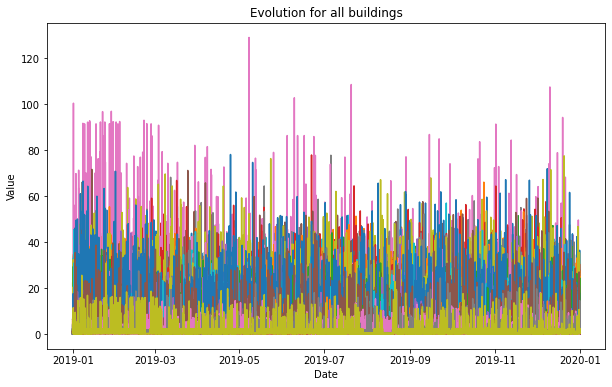

In [8]:
# Get the column names (building names) from the DataFrame
building_columns = df_to_show.columns

# Set the figure size to 10x6 inches
plt.figure(figsize=(10, 6))

# Iterate through each building column and plot the curve on the same graph
for building in building_columns:
    # Plot the data for the current building using the DataFrame index
    plt.plot(df_to_show.index, df_to_show[building], label=building)

# Add title and axis labels
plt.title("Evolution for all buildings")  # Set the plot title
plt.xlabel("Date")  # Label for the x-axis
plt.ylabel("Value")  # Label for the y-axis

# Uncomment the line below if you want to display legends for each building
# plt.legend()

# Display the plot
plt.show()


# Représentation de la Consommation d'Électricité pour l'Ensemble des Bâtiments Chaque jour sur une Année (2019)

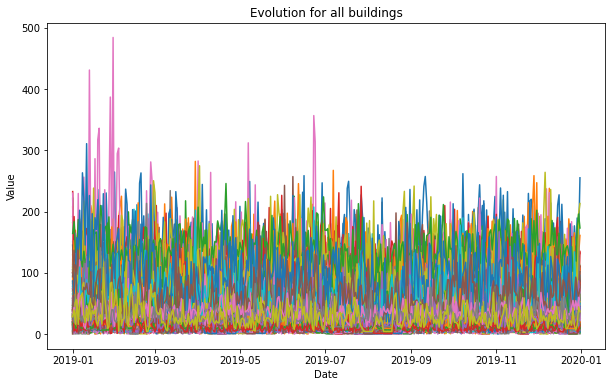

In [9]:
# Create a copy of df_to_show DataFrame to avoid modifying the original data
df_to_show_day = df_to_show.copy()

# Extract the date component from the index and add it as a new "date" column
df_to_show_day["date"] = df_to_show.index.date

# Group the DataFrame by date and calculate the sum of each column for each date
df_to_show_day = df_to_show_day.groupby(["date"]).sum()

# Reset the index to make "date" a regular column again
df_to_show_day = df_to_show_day.reset_index()

# Set the figure size to 10x6 inches
plt.figure(figsize=(10, 6))

# Iterate through each building column and plot the curve on the same graph
for building in building_columns:
    plt.plot(df_to_show_day.date, df_to_show_day[building], label=building)

# Add legends and axis labels
plt.title("Evolution for all buildings")
plt.xlabel("Date")
plt.ylabel("Value")

# Uncomment the line below if you want to display legends for each building
# plt.legend()

# Display the plot
plt.show()

### Représentation de la Consommation d'Électricité pour l'Ensemble des Bâtiments Chaque mois sur une Année (2019)


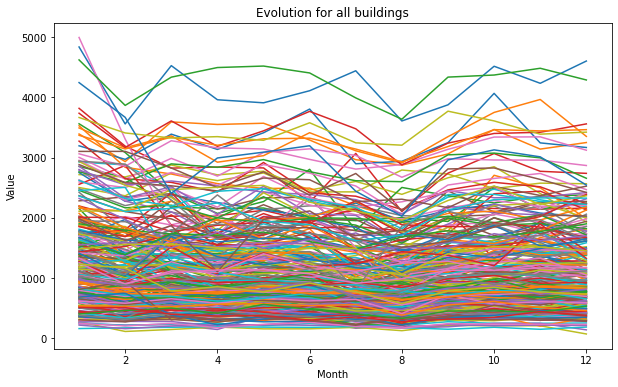

In [10]:
# Create a copy of df_to_show DataFrame to avoid modifying the original data
df_to_show_month = df_to_show.copy()

# Extract the month component from the index and add it as a new "month" column
df_to_show_month["month"] = df_to_show.index.month

# Group the DataFrame by month and calculate the sum of each column for each month
df_to_show_month = df_to_show_month.groupby(["month"]).sum()

# Reset the index to make "month" a regular column again
df_to_show_month = df_to_show_month.reset_index()

# Display the resulting DataFrame (optional, commented out)
# print(df_to_show_month)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Iterate through each building column and plot the curve on the same graph
for building in building_columns:
    # Plot the data for the current building
    plt.plot(df_to_show_month.month, df_to_show_month[building], label=building)

# Add title and axis labels to the plot
plt.title("Evolution for all buildings")
plt.xlabel("Month")
plt.ylabel("Value")

# Uncomment the line below to display legends for each building
# plt.legend()

# Display the plot
plt.show()

In [11]:
# Create a copy of df_to_show_day DataFrame to avoid modifying the original data
result_df = df_to_show_day.copy()

# Convert the 'date' column to datetime format
result_df.date = pd.to_datetime(result_df.date)

# Insert a new column 'day' next to the 'date' column, representing the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
result_df.insert(
    result_df.columns.get_loc("date") + 1, "day", result_df["date"].dt.weekday
)

# Display the resulting DataFrame
print(result_df)

# Extract the column names starting from the third column (building IDs)
buildings_ids = result_df.columns[2:]

# Display the building IDs
print(buildings_ids)

          date  day  BATIMENT0000000217034044  BATIMENT0000000217080199  \
0   2019-01-01    1                 20.438484                121.747816   
1   2019-01-02    2                 47.058268                 95.637167   
2   2019-01-03    3                 17.812635                 75.577454   
3   2019-01-04    4                 20.174305                 99.607155   
4   2019-01-05    5                  9.973508                150.491550   
..         ...  ...                       ...                       ...   
360 2019-12-27    4                  9.671029                 64.051114   
361 2019-12-28    5                 39.066286                 59.749710   
362 2019-12-29    6                 36.997683                102.249701   
363 2019-12-30    0                 12.465726                138.829931   
364 2019-12-31    1                 18.958858                 46.154508   

     BATIMENT0000000217083345  BATIMENT0000000217084447  \
0                   27.666318           

# Création de la DataFrame Capturant le Comportement Hebdomadaire de la Consommation de Chaque Bâtiment

Dans le cadre de notre étude, nous construisons une DataFrame qui encapsule le comportement hebdomadaire de la consommation pour chaque bâtiment. Cette analyse nous permettra de mieux comprendre les tendances de consommation sur une base hebdomadaire, fournissant ainsi des informations essentielles pour des décisions éclairées en matière de gestion énergétique.

Les données contenues dans cette DataFrame incluent les profils de consommation de chaque bâtiment, segmentés par semaine. Cette approche nous permettra d'identifier des schémas récurrents, d'analyser les variations de consommation et d'adapter nos stratégies en conséquence.

Cette DataFrame constituera une ressource cruciale pour notre compréhension du comportement énergétique des bâtiments à l'échelle hebdomadaire, contribuant ainsi à une gestion plus efficace et durable de la consommation d'électricité.

Nous allons creer 11 variables pour détecter le comportement de consommation de chaque bâtiment. Ceux-ci sont :

    Consommation totale sur la période d'observation (total KW);
    Moyenne de la consommation quotidienne d'électricité (average per day);
    Pourcentage de la consommation totale le lundi (% Monday);
    Pourcentage de la consommation totale le mardi (% Tuesday);
    Pourcentage de la consommation totale le mercredi (% Wednesday);
    Pourcentage de la consommation totale le jeudi (% Thursday);
    Pourcentage de la consommation totale le vendredi (% Friday);
    Pourcentage de la consommation totale le samedi (% Saturday);
    Pourcentage de la consommation totale le dimanche (% Sunday);
    Pourcentage de la consommation totale les jours de semaine (% weekday);
    Pourcentage de la consommation totale le week-end (% weekend).



In [12]:
# Create a DataFrame 'data_to_cluster' to store aggregated information for clustering
data_to_cluster = pd.DataFrame(
    {"total KW": np.sum(result_df[buildings_ids]).values},
    index=buildings_ids,
)

# Calculate and add the average electricity consumption per day for each building
data_to_cluster["average per day"] = result_df[buildings_ids].mean().values

# Calculate the percentage of electricity consumption for each building on Mondays and add to 'data_to_cluster'
data_to_cluster["% Monday"] = (
    result_df[result_df["day"] == 0][buildings_ids].sum().values
    / data_to_cluster["total KW"]
    * 100
)

# Repeat the process for each day of the week (Tuesday to Sunday)
data_to_cluster["% Tuesday"] = (
    result_df[result_df["day"] == 1][buildings_ids].sum().values
    / data_to_cluster["total KW"]
    * 100
)
data_to_cluster["% Wednesday"] = (
    result_df[result_df["day"] == 2][buildings_ids].sum().values
    / data_to_cluster["total KW"]
    * 100
)
data_to_cluster["% Thursday"] = (
    result_df[result_df["day"] == 3][buildings_ids].sum().values
    / data_to_cluster["total KW"]
    * 100
)
data_to_cluster["% Friday"] = (
    result_df[result_df["day"] == 4][buildings_ids].sum().values
    / data_to_cluster["total KW"]
    * 100
)
data_to_cluster["% Saturday"] = (
    result_df[result_df["day"] == 5][buildings_ids].sum().values
    / data_to_cluster["total KW"]
    * 100
)
data_to_cluster["% Sunday"] = (
    result_df[result_df["day"] == 6][buildings_ids].sum().values
    / data_to_cluster["total KW"]
    * 100
)

# Calculate the percentage of electricity consumption for each building on weekdays and add to 'data_to_cluster'
data_to_cluster["% weekday"] = (
    result_df[(result_df["day"] != 5) & (result_df["day"] != 6)][buildings_ids]
    .sum()
    .values
    / data_to_cluster["total KW"]
    * 100
)

# Calculate the percentage of electricity consumption for each building on weekends and add to 'data_to_cluster'
data_to_cluster["% weekend"] = (
    result_df[(result_df["day"] == 5) | (result_df["day"] == 6)][buildings_ids]
    .sum()
    .values
    / data_to_cluster["total KW"]
    * 100
)

# Display the first few rows of 'data_to_cluster'
data_to_cluster.head()

,total KW,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend
BATIMENT0000000217034044,8687.356298,23.800976,12.717562,13.333116,14.569028,13.583628,14.250736,14.715984,16.829946,68.454070,31.545930
BATIMENT0000000217080199,39095.032699,107.109679,13.157252,13.654931,13.943260,14.330803,13.428499,16.483562,15.001692,68.514746,31.485254
BATIMENT0000000217083345,7518.664149,20.599080,13.401495,13.765170,14.123466,13.882450,14.178102,15.391458,15.257859,69.350683,30.649317
BATIMENT0000000217084447,12024.879123,32.944874,14.021066,14.269197,14.053962,13.240383,15.985528,12.136892,16.292972,71.570136,28.429864
BATIMENT0000000217110612,2973.580106,8.146795,16.314859,12.717559,15.967110,16.715612,13.159660,11.850501,13.274699,74.874800,25.125200


# Normalization des données 

Puisqu'on utilisera Kmeans pour clusteriser les donnée, la normalisation des données est essentielle car cet algorithme est sensible à l'échelle des variables. 

La normalisation garantit que toutes les caractéristiques contribuent de manière équitable à la formation des clusters en ajustant les valeurs des variables pour qu'elles aient une distribution comparable, évitant ainsi une dominance injuste de certaines caractéristiques sur d'autres.
Pour cette normalisation nous utilisons la standardisation.
La formule de standardisation (ou z-score) d'une variable XX dans un ensemble de données est donnée par :

Z=(X−μ)/σ​

où ZZ est la valeur standardisée, XX est la valeur originale de la variable, μμ est la moyenne de la variable, et σσ est l'écart type de la variable. Cette formule transforme la variable originale en une distribution avec une moyenne de 0 et un écart type de 1, permettant ainsi de comparer et d'intégrer différentes variables dans une analyse statistique plus cohérente.

In [13]:
from sklearn.preprocessing import StandardScaler


scaller = StandardScaler()
data_to_cluster_normalized = pd.DataFrame(
    scaller.fit_transform(data_to_cluster.copy()),
    columns=data_to_cluster.columns,
    index=data_to_cluster.index,
)

data_to_cluster_normalized.head()
data_to_cluster_normalized_copy=data_to_cluster_normalized.copy()

# La correlation

Nous allons ensuite calculer la matrice de corrélation entre les variables d'un ensemble de données normalisé (data_to_cluster_normalized), et ensuite nous allons créer un graphique de type heatmap pour visualiser cette matrice de corrélation. Chaque cellule de la heatmap représente le degré de corrélation entre deux variables, avec une échelle de couleurs allant de -1 à 1. Les étiquettes des axes sont ajustées pour correspondre aux noms des variables, et une barre de couleur est ajoutée sur le côté pour indiquer les valeurs de corrélation. Ce graphique aide à identifier les relations linéaires entre les variables du jeu de données.


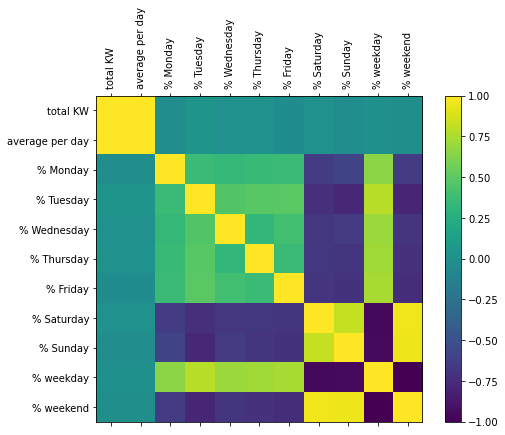

In [14]:
# Calculate the correlation matrix for the normalized data
corr = data_to_cluster_normalized.corr()

# Create a figure and axis for the correlation matrix plot
fig, ax = plt.subplots(figsize=(8, 6))

# Display the correlation matrix as a color-coded heatmap
cax = ax.matshow(corr, vmin=-1, vmax=1)
ax.matshow(corr)

# Set the tick locations and labels for both axes
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
ax.grid(False)

# Add a colorbar to the right of the plot
plt.colorbar(
    cax,
)

# Display the plot
plt.show()



Comme on peut le deviner, la "puissance totale en kilowatts" présente une forte corrélation positive avec la "moyenne par jour". En outre, le "% samedi" et le "% dimanche" présentent également une forte corrélation positive avec le "% week-end" et une corrélation négative avec le "% jour de la semaine". De même, le "% lundi" jusqu'au "% vendredi" présente une corrélation positive avec le "% weekday" et une correlation negative avec "% week-end".

La corrélation  évalue la relation entre deux variables.

Une corrélation positive signifie que lorsque la valeur d'une variable augmente, la valeur de l'autre variable a tendance à augmenter également.

Une corrélation négative indique que lorsque la valeur d'une variable augmente, la valeur de l'autre variable a tendance à diminuer.

Une corrélation nulle indique l'absence de relation linéaire entre les deux variables.

# Calcul du nombre des clusters 
Pour le calcul du nombre des clusters nous allons utiliser La méthode du coude (elbow method) et le silhouette score.


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Wi

inertia [1930.9105639177774, 1578.8906524608828, 1340.7075784917968, 1204.436667964075, 1119.0334135577875, 1051.3127375145245, 1008.098764383443, 968.7387588268908, 947.9406642072355, 899.8345717082769, 883.046137716535, 845.2279838228528, 819.4067476748365, 796.5006053839803, 778.565714009737, 753.2969338769163, 754.8722004568305, 727.1535943560075, 712.0060061644729]
silhouette_score [0.2873367455242082, 0.21455356004210277, 0.22821631906203016, 0.20879387142875608, 0.17391028487068375, 0.1777415340146095, 0.1641401506688058, 0.16230981391123722, 0.13604387856198735, 0.13273935624255898, 0.13332369081535422, 0.13574225993713804, 0.1270960832581102, 0.13849292321741782, 0.14097252620410453, 0.1341770312383257, 0.12320149033097463, 0.12995785083871675, 0.12355178389209265]


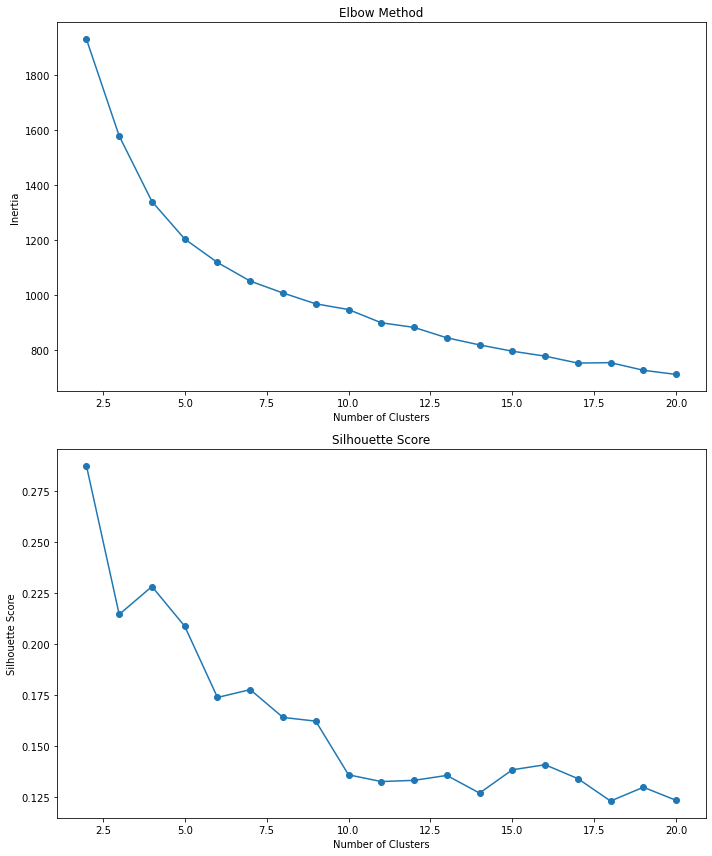

Optimal number of clusters (silhouette): 2
Silhouette score associated: 0.2873367455242082


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


def find_optimal_clusters(X, max_clusters=20):
    # Lists to store inertia values and silhouette scores
    inertia_values = []
    silhouette_scores = []

    # Iterate over different numbers of clusters
    for n_clusters in range(2, max_clusters + 1):
        # Create a KMeans instance with the current number of clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10)

        # Fit the KMeans model and predict cluster labels
        cluster_labels = kmeans.fit_predict(X)

        # Calculate inertia (within-cluster sum of squares)
        inertia_values.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    print('inertia',inertia_values)
    print('silhouette_score',silhouette_scores )
    # Create a figure with two subplots stacked vertically
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))

    # Plot the elbow curve
    axs[0].plot(range(2, max_clusters + 1), inertia_values, marker="o")
    axs[0].set_title("Elbow Method")
    axs[0].set_xlabel("Number of Clusters")
    axs[0].set_ylabel("Inertia")

    # Plot the silhouette score curve
    axs[1].plot(range(2, max_clusters + 1), silhouette_scores, marker="o")
    axs[1].set_title("Silhouette Score")
    axs[1].set_xlabel("Number of Clusters")
    axs[1].set_ylabel("Silhouette Score")

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

    # Find the number of clusters that maximizes the silhouette score
    optimal_clusters_silhouette = (
        np.argmax(silhouette_scores) + 2
    )  # Add 2 because the loop starts from 2 clusters
    optimal_score_silhouette = silhouette_scores[
        optimal_clusters_silhouette - 2
    ]  # Score associated with the optimal number of clusters

    # Find the number of clusters that marks the elbow
    optimal_clusters_elbow = (
        np.argmin(inertia_values) + 2
    )  # Add 2 because the loop starts from 2 clusters

    return optimal_clusters_silhouette, optimal_score_silhouette, optimal_clusters_elbow


# Use the function with your normalized data
(
    optimal_num_clusters_silhouette,
    optimal_silhouette_score,
    optimal_num_clusters_elbow,
) = find_optimal_clusters(data_to_cluster_normalized)

print(f"Optimal number of clusters (silhouette): {optimal_num_clusters_silhouette}")
print(f"Silhouette score associated: {optimal_silhouette_score}")
# print(f"Optimal number of clusters (elbow method): {optimal_num_clusters_elbow}")

# Kmeans
K-means est un algorithme de clustering largement utilisé en analyse de données et en apprentissage non supervisé, un algorithme de clustering de partitionnement, ce qui signifie qu'il divise un ensemble de données en un nombre prédéfini de clusters. Il appartient à la famille des méthodes de clustering dites "centroïdes" ou "prototypes". L'objectif principal de K-means est de minimiser la somme des carrés des distances entre les points de données et les centroïdes de leurs clusters respectifs.
L'objectif du clustering est de diviser un ensemble de données en groupes homogènes appelés clusters, de sorte que les points de données au sein d'un même cluster soient plus similaires entre eux qu'avec ceux d'autres clusters. 


In [16]:
nb_clusters=2 
# Create a KMeans clustering model 
cluster = KMeans(n_clusters=nb_clusters, random_state=5, init="k-means++", n_init=20).fit(
    data_to_cluster_normalized
)

# Predict cluster labels and assign them to the dataframe
data_to_cluster_normalized["cluster_Kmeans"] = cluster.predict(
    data_to_cluster_normalized
)



c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


# Nombre des elements par cluster

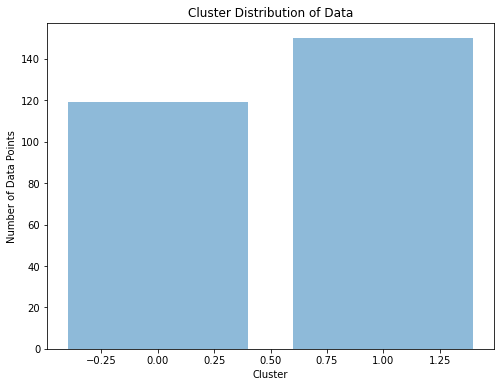

1    150
0    119
Name: cluster_Kmeans, dtype: int64


In [17]:
# Create a DataFrame with the counts of data points in each cluster
d = pd.DataFrame(data_to_cluster_normalized.cluster_Kmeans.value_counts())

# Create a bar plot to visualize the distribution of data points across clusters
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(d.index, d["cluster_Kmeans"], align="center", alpha=0.5)

# Set axis labels and plot title
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.title("Cluster Distribution of Data")

# Display the plot
plt.show()

# Display the count of data points in each cluster
cluster_counts = data_to_cluster_normalized["cluster_Kmeans"].value_counts()
print(cluster_counts)

In [18]:
# Importing the necessary function for calculating Euclidean distances
from sklearn.metrics.pairwise import euclidean_distances

# Calculate the pairwise Euclidean distances between cluster centers
distance = euclidean_distances(cluster.cluster_centers_)

# Display the resulting distance matrix
distance

array([[0.        , 3.93615759],
       [3.93615759, 0.        ]])

# Visualisation de la segmentation

Nous allons réaliser une visualisation en deux dimensions des données segmentées à l'aide de l'algorithme de clustering KMeans.

Les données sont réduites à deux dimensions à l'aide de l'analyse en composantes principales (PCA) et sont ensuite représentées dans un graphique de dispersion.

Les points de données sont colorés en fonction de leur attribution à un cluster déterminé par KMeans, et les centres de ces clusters sont marqués par des croix bleues. Le graphique comprend des axes labellisés, une barre de couleur pour représenter les clusters, et un titre indiquant "Data Segmentation".


L'Analyse en Composantes Principales (ACP), ou PCA en anglais (Principal Component Analysis), est une technique statistique qui vise à transformer un ensemble de variables corrélées en un nouvel ensemble de variables non corrélées, appelées composantes principales. L'objectif est de réduire la dimensionnalité des données tout en préservant autant que possible leur variance.

L'avantage de PCA réside dans sa capacité à simplifier des ensembles de données complexes tout en préservant l'essentiel de l'information

# Representation 2d

In [19]:
from sklearn.decomposition import PCA

# List of columns to reduce
columns_to_reduce = [
    "total KW",
    "average per day",
    "% Monday",
    "% Tuesday",
    "% Wednesday",
    "% Thursday",
    "% Friday",
    "% Saturday",
    "% Sunday",
    "% weekday",
    "% weekend",
]

# Create an instance of PCA with 3 principal components
pca = PCA(n_components=2)

# Transform the data using PCA to obtain the new coordinates (x, y, z)
data_to_cluster_normalized["xx"] = pca.fit_transform(data_to_cluster_normalized[columns_to_reduce])[:, 0]
data_to_cluster_normalized["yy"] = pca.fit_transform(data_to_cluster_normalized[columns_to_reduce])[:, 1]

# Get the centers of each cluster for plotting
cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=["xx", "yy"])
cluster_centers["cluster"] = range(0, len(cluster_centers))
print(cluster_centers)


         xx        yy  cluster
0  2.190201  0.108228        0
1 -1.737559 -0.085861        1


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


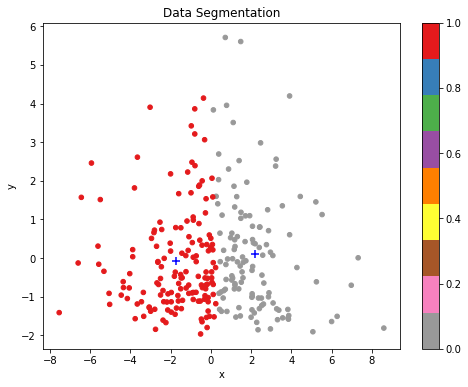

In [20]:
# Plotting for 2-dimention
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    data_to_cluster_normalized["xx"],
    data_to_cluster_normalized["yy"],
    c=data_to_cluster_normalized["cluster_Kmeans"],
    s=21,
    cmap=plt.cm.Set1_r,
)
ax.scatter(cluster_centers["xx"], cluster_centers["yy"], s=70, c="blue", marker="+")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.colorbar(scatter)
plt.title("Data Segmentation")
plt.show()

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


          x         y         z  cluster
0  2.190201  0.108228 -0.013352        0
1 -1.737559 -0.085861  0.010592        1


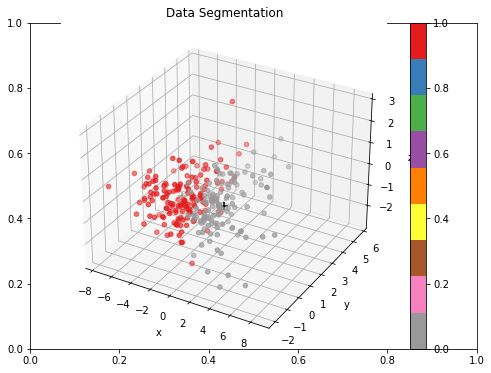

In [21]:
# Create an instance of PCA with 3 principal components
pca = PCA(n_components=3)

# Transform the data using PCA to obtain the new coordinates (x, y, z)
data_to_cluster_normalized["x"] = pca.fit_transform(
    data_to_cluster_normalized[columns_to_reduce]
)[:, 0]
data_to_cluster_normalized["y"] = pca.fit_transform(
    data_to_cluster_normalized[columns_to_reduce]
)[:, 1]
data_to_cluster_normalized["z"] = pca.fit_transform(
    data_to_cluster_normalized[columns_to_reduce]
)[:, 2]

# Get the centers of each cluster for plotting
cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=["x", "y", "z"])
cluster_centers["cluster"] = range(0, len(cluster_centers))
print(cluster_centers)

# Plotting for 3-Dimention
fig, ax = plt.subplots(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    data_to_cluster_normalized["x"],
    data_to_cluster_normalized["y"],
    data_to_cluster_normalized["z"],
    c=data_to_cluster_normalized["cluster_Kmeans"],
    s=21,
    cmap=plt.cm.Set1_r,
)
ax.scatter(
    cluster_centers["x"],
    cluster_centers["y"],
    cluster_centers["z"],
    s=70,
    c="black",
    marker="+",
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.colorbar(scatter)
plt.title("Data Segmentation")
plt.show()

D'après les graphiques ci-dessus, on peut constater que tous les segments sont bien séparés les uns des autres

### Liste avec les bâtiments appartenant au même cluster

### Construction de la data originale (pas normalisé) avec les clusters associés 


In [22]:
# Copy the data frame for clustering and assign it to a new variable
df_with_clusters = data_to_cluster.copy()

# Add the K-means cluster labels to the copied data frame
df_with_clusters["cluster_Kmeans"] = data_to_cluster_normalized["cluster_Kmeans"]

# Uncomment the following line to display descriptive statistics of the data frame
df_with_clusters.describe()


,total KW,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend,cluster_Kmeans
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,14410.448449,39.480681,13.907258,14.179423,13.982161,13.833997,13.937060,15.066301,15.093800,69.839899,30.160101,0.557621
std,9133.231058,25.022551,1.032363,1.162667,1.144561,1.257684,1.218380,2.214548,2.161521,4.175961,4.175961,0.497595
min,2012.366082,5.513332,10.710669,10.767806,10.355012,10.676880,8.595042,8.695573,7.376538,57.474408,16.072111,0.000000
25%,7901.056442,21.646730,13.239379,13.465382,13.281499,12.958326,13.161393,13.771183,13.706337,67.353924,27.565595,0.000000
50%,12028.120647,32.953755,13.874877,14.133898,14.015490,13.904750,13.962463,15.054059,15.118959,69.683774,30.316226,1.000000
75%,18556.577954,50.839940,14.534165,14.852427,14.634934,14.558119,14.783335,16.448481,16.434899,72.434405,32.646076,1.000000
max,51370.293338,140.740530,17.766383,19.010616,19.893955,19.810373,16.810931,22.403101,23.488161,83.927889,42.525592,1.000000


Les valeurs moyennes pour différentes caractéristiques dans chaque cluster identifié par l'algorithme de clustering

In [23]:
# Configure display to show all columns in the DataFrame
pd.set_option("display.max_columns", None)

# Create a DataFrame with column-wise means grouped by K-means clusters
mean_values = (
    df_with_clusters[df_with_clusters.columns].groupby(["cluster_Kmeans"]).agg([np.mean])
)

# Display the DataFrame of means
print(mean_values.head())

# Reset the display option to avoid potential issues
pd.reset_option("display.max_columns")

                    total KW average per day   % Monday  % Tuesday  \
                        mean            mean       mean       mean   
cluster_Kmeans                                                       
0               15209.043093       41.668611  14.520502  14.900044   
1               13776.896699       37.744922  13.420751  13.607731   

               % Wednesday % Thursday   % Friday % Saturday   % Sunday  \
                      mean       mean       mean       mean       mean   
cluster_Kmeans                                                           
0                14.733848  14.586014  14.709876  13.226569  13.323148   
1                13.385822  13.237397  13.323959  16.525822  16.498517   

                % weekday  % weekend  
                     mean       mean  
cluster_Kmeans                        
0               73.450283  26.549717  
1               66.975661  33.024339  


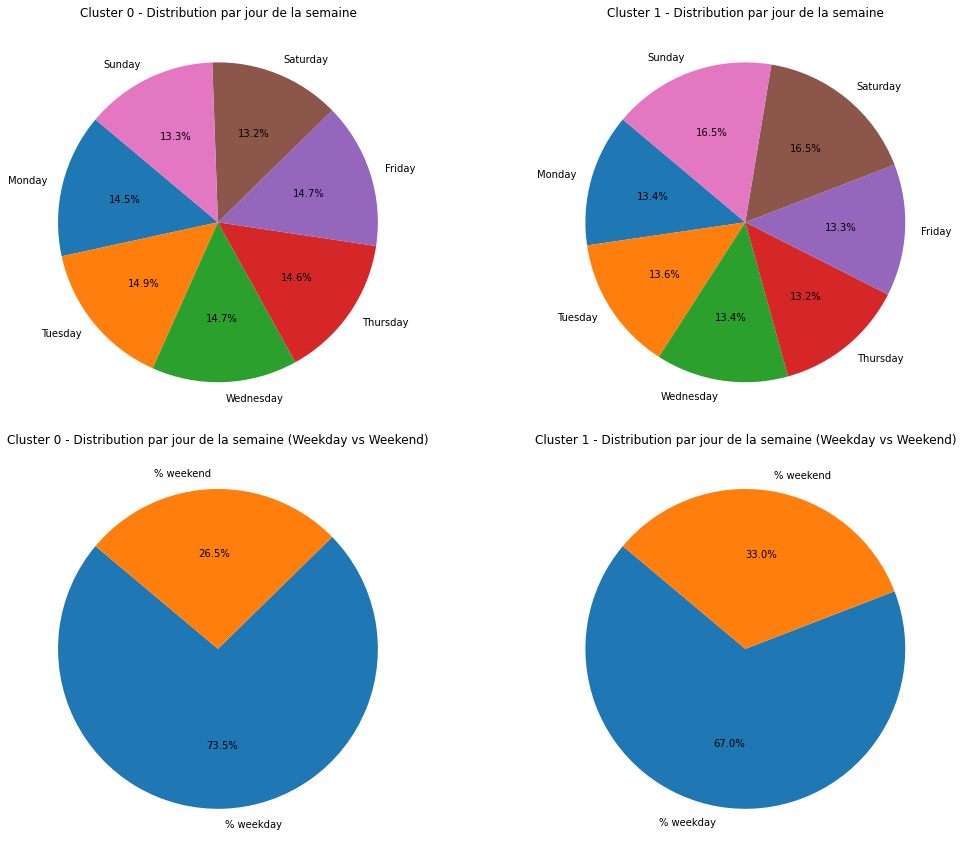

In [24]:
import matplotlib.pyplot as plt

# Jours de la semaine
days_of_week = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]


# Fonction pour créer un graphique à secteurs
def create_pie_chart(ax, data, title, days_of_week):
    ax.pie(data, labels=days_of_week, autopct="%1.1f%%", startangle=140)
    ax.set_title(title)


# Créer une grille de sous-graphiques avec deux lignes et deux colonnes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Graphique pour chaque cluster
for i, cluster in enumerate(mean_values.index):
    row = i // 2
    col = i % 2
    cluster_data = mean_values.loc[cluster].values[
        2:-2
    ]  # Exclure les colonnes % weekday et % weekend
    title = f"Cluster {cluster} - Distribution par jour de la semaine"
    create_pie_chart(axs[row, col], cluster_data, title, days_of_week)

# Graphiques pour weekday et weekend
weekday_weekend_data = mean_values[["% weekday", "% weekend"]].values
create_pie_chart(
    axs[1, 0],
    weekday_weekend_data[0],
    "Cluster 0 - Distribution par jour de la semaine (Weekday vs Weekend)",
    ["% weekday", "% weekend"],
)
create_pie_chart(
    axs[1, 1],
    weekday_weekend_data[1],
    "Cluster 1 - Distribution par jour de la semaine (Weekday vs Weekend)",
    ["% weekday", "% weekend"],
)

plt.tight_layout()
plt.show()

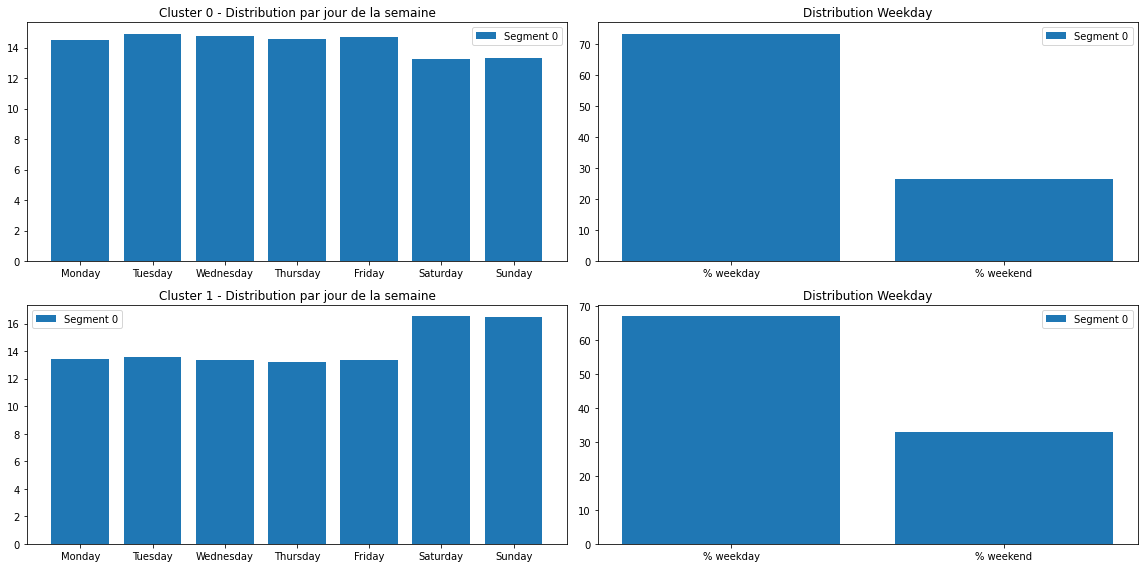

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Jours de la semaine
days_of_week = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
columns = ["% weekday", "% weekend"]
weekday_weekend_data = mean_values[["% weekday", "% weekend"]].values


# Fonction pour créer un graphique en barres empilées
def create_stacked_bar_chart(ax, data, title, days_of_week):
    bottom = np.zeros(len(data[0]))
    for i, row in enumerate(data):
        ax.bar(days_of_week, row, bottom=bottom, label=f"Segment {i}")
        bottom += row
    ax.set_title(title)
    ax.legend()


# Créer une grille de sous-graphiques avec deux colonnes
fig, axs = plt.subplots(nrows=2, ncols=nb_clusters, figsize=(16, 8))

# Graphique pour chaque cluster
for i, cluster in enumerate(mean_values.index):
    cluster_data = [mean_values.loc[cluster].values[2:-2]]
    title = f"Cluster {cluster} - Distribution par jour de la semaine"
    create_stacked_bar_chart(axs[i, 0], cluster_data, title, days_of_week)

    # Stacked bar charts for weekday and weekend
    create_stacked_bar_chart(
        axs[i, 1],
        [weekday_weekend_data[i]],
        "Distribution Weekday",
        columns,
    )

plt.tight_layout()
plt.show()

Analyse des resultats  pour les deux clusters obtenus : 

-cluster 0  --150 bâtiments

-cluster 1  --119 bâtiments

Consommation d'électricité :

    Cluster 0 a une consommation moyenne de 13 776,90 KW avec une moyenne quotidienne de 37,74 KW.
    Cluster 1 a une consommation moyenne légèrement plus élevée de 15 209,04 KW avec une moyenne quotidienne de 41,67 KW.

Tendances hebdomadaires et week-end :

    Cluster 0 montre une distribution relativement égale de la consommation entre les jours de la semaine et le week-end.
    Cluster 1 a une répartition légèrement plus élevée de la consommation pendant les jours de semaine par rapport au week-end.

Comme les données vient du secteur residentiel et represente la consommation d'éléctricité journaliere, nous pouvons considerer que la repartition faites est bonne. 

Cluster 0

Dans le cluster 0, nous avons un pourcentage de consommation journaliere relativement égale.
Les habitudes de consommation pourraient être caractérisées par une utilisation uniforme des appareils électriques et des équipements ménagers chaque jour.     

Cluster 1

Les résidents du Cluster 1 pourraient avoir une consommation d'électricité légèrement plus élevée pendant les jours de semaine par rapport au week-end.
Cela pourrait être attribuable à des activités spécifiques liées à la semaine, telles que le travail à domicile, l'utilisation plus fréquente d'appareils énergivores, ou d'autres routines spécifiques aux jours ouvrables.


## Agglomerative Clustering

L'Agglomerative Clustering est une technique de regroupement de données qui commence par traiter chaque point de données comme un cluster individuel et fusionne progressivement les clusters les plus proches les uns des autres jusqu'à ce qu'un seul cluster contenant toutes les données soit formé. C'est une approche ascendante où l'on part des éléments individuels pour construire la hiérarchie des clusters.

Le processus commence par considérer chaque point comme un cluster séparé. Ensuite, les deux clusters les plus similaires sont fusionnés pour créer un nouveau cluster. Ce processus se répète jusqu'à ce qu'un seul cluster global soit formé. La similarité entre les clusters est généralement mesurée à l'aide de mesures de distance telles que la distance euclidienne.

L'un des avantages de l'Agglomerative Clustering est sa flexibilité pour produire des dendrogrammes, des structures arborescentes qui montrent comment les clusters sont fusionnés à chaque étape. Cela permet une analyse visuelle de la structure hiérarchique des groupements.

In [26]:
data_to_cluster_HAC = data_to_cluster_normalized[columns_to_reduce]

In [27]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=nb_clusters, linkage="ward")
hc_fitted = hc.fit(data_to_cluster_HAC)
y_pred = hc.fit_predict(data_to_cluster_HAC)

silhouette_avg = silhouette_score(data_to_cluster_HAC, y_pred)
print("Silhouette score:", silhouette_avg)
data_to_cluster_HAC["cluster_HAC"] = y_pred
data_to_cluster_HAC

C:\Users\cghinda\AppData\Local\Temp/ipykernel_14696/516377801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_cluster_HAC["cluster_HAC"] = y_pred


,total KW,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend,cluster_HAC
BATIMENT0000000217034044,-0.627791,-0.627791,-1.154548,-0.729259,0.513700,-0.199443,0.257933,-0.158484,0.804703,-0.332477,0.332477,0
BATIMENT0000000217080199,2.707760,2.707760,-0.727848,-0.451952,-0.034051,0.395753,-0.418186,0.641171,-0.042692,-0.317920,0.317920,0
BATIMENT0000000217083345,-0.755990,-0.755990,-0.490821,-0.356960,0.123689,0.038597,0.198207,0.147101,0.076041,-0.117369,0.117369,0
BATIMENT0000000217084447,-0.261684,-0.261684,0.110445,0.077357,0.062850,-0.472869,1.684439,-1.325268,0.555816,0.415105,-0.415105,0
BATIMENT0000000217110612,-1.254560,-1.254560,2.336473,-1.259680,1.737478,2.295477,-0.639250,-1.454832,-0.843153,1.207934,-1.207934,0
...,...,...,...,...,...,...,...,...,...,...,...,...
BATIMENT0000000353422877,-0.496964,-0.496964,0.063299,-0.366318,0.009218,0.266510,-0.298997,0.169279,0.001961,-0.090785,0.090785,0
BATIMENT0000000353693833,0.762097,0.762097,-0.093971,0.761995,0.954492,0.533348,0.508641,-0.506188,-0.948838,0.759564,-0.759564,0
BATIMENT0000000353761538,-0.170263,-0.170263,0.408684,1.271912,0.341740,0.263730,-0.223781,-0.433882,-0.643089,0.562961,-0.562961,0
BATIMENT0000000353771149,-0.397002,-0.397002,-1.481817,-0.663202,-1.358248,0.145108,-0.342360,0.625300,1.251583,-0.979434,0.979434,1


In [28]:
# Display the count of data points in each cluster
cluster_HAC_counts = data_to_cluster_HAC["cluster_HAC"].value_counts()
print(cluster_HAC_counts)

0    191
1     78
Name: cluster_HAC, dtype: int64


   cluster_HAC
0          191
1           78


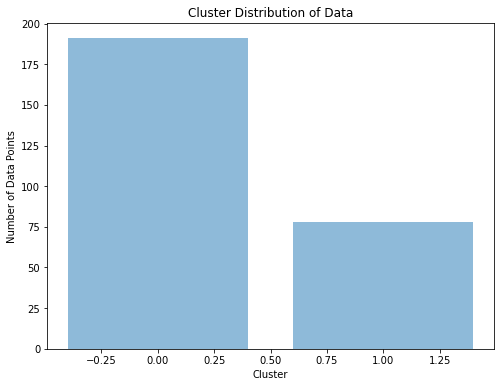

In [29]:
# Create a DataFrame with the counts of data points in each cluster
d = pd.DataFrame(data_to_cluster_HAC.cluster_HAC.value_counts())
print(d)
# Create a bar plot to visualize the distribution of data points across clusters
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(d.index, d["cluster_HAC"], align="center", alpha=0.5)

# Set axis labels and plot title
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.title("Cluster Distribution of Data")

# Display the plot
plt.show()

Visualisation des données dans 2 dimensions

C:\Users\cghinda\AppData\Local\Temp/ipykernel_14696/3340839221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_cluster_HAC["xx"] = pca.fit_transform(data_to_cluster_HAC[columns_to_reduce])[
C:\Users\cghinda\AppData\Local\Temp/ipykernel_14696/3340839221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_cluster_HAC["yy"] = pca.fit_transform(


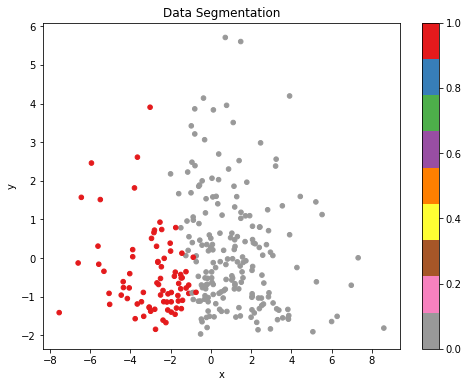

In [30]:
from sklearn.decomposition import PCA

# Create an instance of PCA with 3 principal components
pca = PCA(n_components=2)

# Transform the data using PCA to obtain the new coordinates (x, y, z)
data_to_cluster_HAC["xx"] = pca.fit_transform(data_to_cluster_HAC[columns_to_reduce])[
    :, 0
]
data_to_cluster_HAC["yy"] = pca.fit_transform(
    data_to_cluster_normalized[columns_to_reduce]
)[:, 1]


# Plotting for 2-dimention
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    data_to_cluster_HAC["xx"],
    data_to_cluster_HAC["yy"],
    c=data_to_cluster_HAC["cluster_HAC"],
    s=21,
    cmap=plt.cm.Set1_r,
)
# ax.scatter(cluster_centers["xx"], cluster_centers["yy"], s=70, c="blue", marker="+")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.colorbar(scatter)
plt.title("Data Segmentation")
plt.show()

In [31]:
df_with_HAC_cluster = data_to_cluster.copy()
df_with_HAC_cluster["cluster_HAC"] = data_to_cluster_HAC["cluster_HAC"]

In [32]:
pd.set_option("display.max_columns", None)

# Afficher le DataFrame avec toutes les colonnes
mean_values_HAC = (
    df_with_HAC_cluster[df_with_HAC_cluster.columns]
    .groupby(["cluster_HAC"])
    .agg([np.mean])
)
print(mean_values_HAC)
# Réinitialiser l'option pour éviter d'autres problèmes d'affichage
pd.reset_option("display.max_columns")

                 total KW average per day   % Monday  % Tuesday % Wednesday  \
                     mean            mean       mean       mean        mean   
cluster_HAC                                                                   
0            15547.618465       42.596215  14.216273  14.595589   14.346563   
1            11625.839822       31.851616  13.150568  13.160352   13.089842   

            % Thursday   % Friday % Saturday   % Sunday  % weekday  % weekend  
                  mean       mean       mean       mean       mean       mean  
cluster_HAC                                                                    
0            14.256620  14.384475  14.063056  14.137425  71.799519  28.200481  
1            12.799112  12.841467  17.522965  17.435693  65.041342  34.958658  


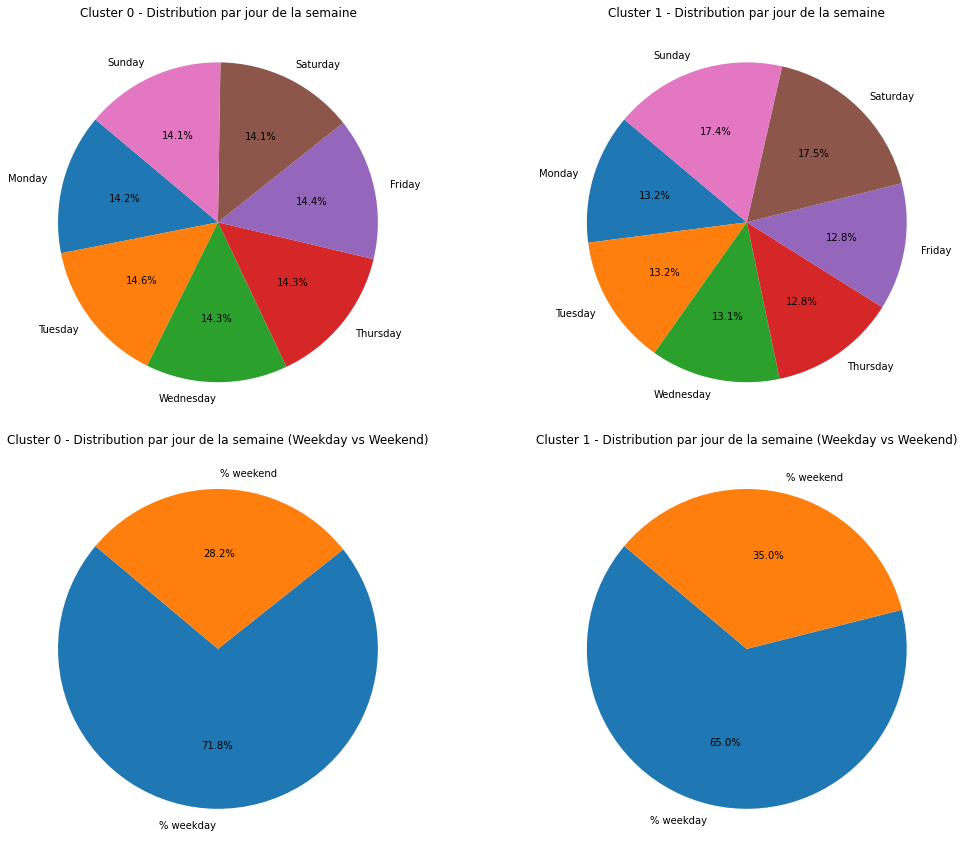

In [34]:
import matplotlib.pyplot as plt

# Jours de la semaine
days_of_week = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]


# Fonction pour créer un graphique à secteurs
def create_pie_chart(ax, data, title, days_of_week):
    ax.pie(data, labels=days_of_week, autopct="%1.1f%%", startangle=140)
    ax.set_title(title)


# Créer une grille de sous-graphiques avec deux lignes et deux colonnes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Graphique pour chaque cluster
for i, cluster in enumerate(mean_values_HAC.index):
    row = i // 2
    col = i % 2
    cluster_data = mean_values_HAC.loc[cluster].values[
        2:-2
    ]  # Exclure les colonnes % weekday et % weekend
    title = f"Cluster {cluster} - Distribution par jour de la semaine"
    create_pie_chart(axs[row, col], cluster_data, title, days_of_week)

# Graphiques pour weekday et weekend
weekday_weekend_data = mean_values_HAC[["% weekday", "% weekend"]].values
create_pie_chart(
    axs[1, 0],
    weekday_weekend_data[0],
    "Cluster 0 - Distribution par jour de la semaine (Weekday vs Weekend)",
    ["% weekday", "% weekend"],
)
create_pie_chart(
    axs[1, 1],
    weekday_weekend_data[1],
    "Cluster 1 - Distribution par jour de la semaine (Weekday vs Weekend)",
    ["% weekday", "% weekend"],
)

plt.tight_layout()
plt.show()

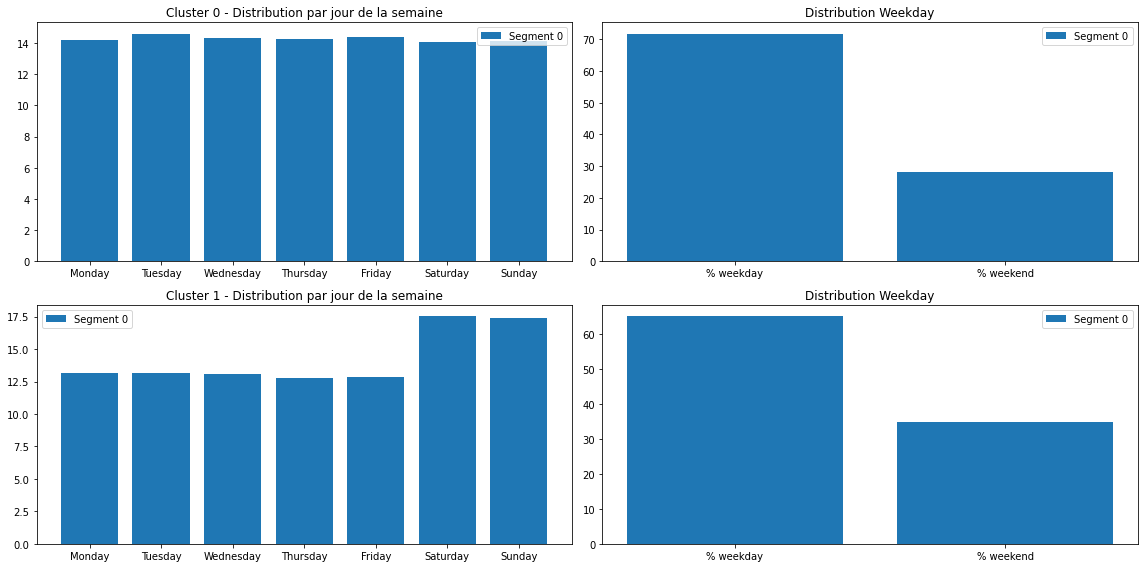

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Jours de la semaine
days_of_week = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
columns = ["% weekday", "% weekend"]
weekday_weekend_data = mean_values_HAC[["% weekday", "% weekend"]].values


# Fonction pour créer un graphique en barres empilées
def create_stacked_bar_chart(ax, data, title, days_of_week):
    bottom = np.zeros(len(data[0]))
    for i, row in enumerate(data):
        ax.bar(days_of_week, row, bottom=bottom, label=f"Segment {i}")
        bottom += row
    ax.set_title(title)
    ax.legend()


# Créer une grille de sous-graphiques avec deux colonnes
fig, axs = plt.subplots(nrows=2, ncols=nb_clusters, figsize=(16, 8))

# Graphique pour chaque cluster
for i, cluster in enumerate(mean_values_HAC.index):
    cluster_data = [mean_values_HAC.loc[cluster].values[2:-2]]
    title = f"Cluster {cluster} - Distribution par jour de la semaine"
    create_stacked_bar_chart(axs[i,0], cluster_data, title, days_of_week)

    # Stacked bar charts for weekday and weekend
    create_stacked_bar_chart(
        axs[i,1],
        [weekday_weekend_data[i]],
        "Distribution Weekday",
        columns,
    )

plt.tight_layout()
plt.show()